In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme(style="whitegrid")

In [2]:
# Importing the dataset 
user_cols = ['user_id', 'location', 'age']
books_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s ', 'img_m', 'img_l']
ratings_cols = ['user_id', 'isbn', 'rating']

users = pd.read_csv('Data/BX-Users.csv', sep=';', encoding='latin-1', names = user_cols, skiprows=1)
books = pd.read_csv('Data/BX-Books.csv', sep=';', encoding='latin-1', names = books_cols, skiprows=1, on_bad_lines='skip')
ratings = pd.read_csv('Data/BX-Book-Ratings.csv', sep=';', encoding='latin-1', names = ratings_cols, skiprows=1)

/tmp/ipykernel_641/1712043036.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Data/BX-Books.csv', sep=';', encoding='latin-1', names = books_cols, skiprows=1, on_bad_lines='skip')


The Book-Crossing dataset comprises 3 tables.
- BX-Users
    -Contains the users. Note that user IDs (`User-ID`) have been anonymized and map to integers. Demographic data is provided (`Location`, `Age`) if available. Otherwise, these fields contain NULL-values.  
    
    

- BX-Books
    - Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (`Book-Title`, `Book-Author`, `Year-Of-Publication`, `Publisher`), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (`Image-URL-S`, `Image-URL-M`, `Image-URL-L`), i.e., small, medium, large. These URLs point to the Amazon web site.  
    
    

- BX-Book-Ratings
    - Contains the book rating information. Ratings (`Book-Rating`) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


### Questions answered through this notebook about the Dataset

1.  Where are most of the users from?
2. Which year had the most and least number of books published? 
3. Who was the most common publisher?
4. Publishers with the highest rated books
5. What are the top 5 books with the most number of ratings?
6. Which are the top rated books?
7. Who are the most frequent authors?
8. Authors with the maximum ratings

In [3]:
print(f'The shape of the users dataset is {users.shape}')
print(f'The shape of the books dataset is {books.shape}')
print(f'The shape of the ratings dataset is {ratings.shape}')

The shape of the users dataset is (278858, 3)
The shape of the books dataset is (271360, 8)
The shape of the ratings dataset is (1149780, 3)


In [7]:
users.location.isna().sum()/users.shape[0]

0.0

In [9]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   isbn     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [17]:
# Cleaning the dataset 
books = books.drop(['img_s ', 'img_m', 'img_l'], axis=1)
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [36]:
# Merge the ratings dataset with the books dataset so that we can get access to the names and authors

combined_df = pd.merge(ratings, books, on='isbn')
all_cols = [col for col in combined_df.columns]
all_cols.remove('rating')
all_cols.append('rating')
combined_df = combined_df[all_cols]
combined_df.head()

,user_id,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,rating
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,0
1,2313,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,5
2,6543,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,0
3,8680,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,5
4,10314,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,9


### Where are most of the users from? 

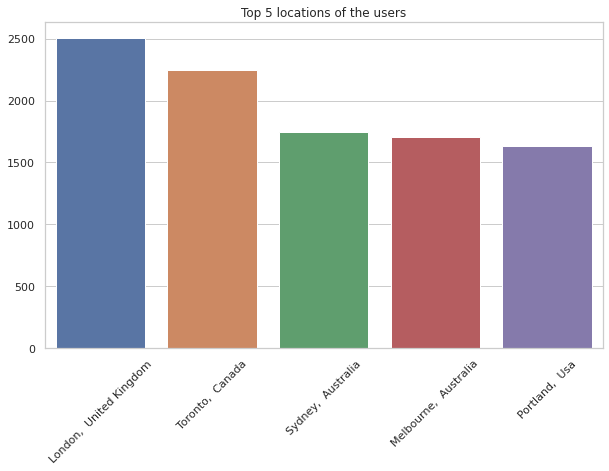

In [114]:
user_loc = users.groupby('location').count()['user_id'].nlargest(5)

x = user_loc.index
x = [location.split(',')[0].capitalize() + ', ' + location.split(',')[2].title() for location in x]
y = user_loc.values

plt.figure(figsize = (10,6))
ax = sns.barplot(x = x, y = y)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Top 5 locations of the users');

### Which year had the most and least number of books published

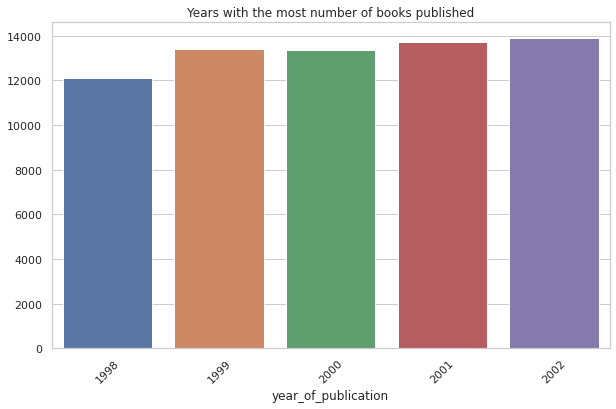

In [118]:
book_years = books.groupby('year_of_publication').count()['isbn'].nlargest(5)

x = book_years.index
y = book_years.values

plt.figure(figsize = (10,6))
ax = sns.barplot(x = x, y = y)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Years with the most number of books published');

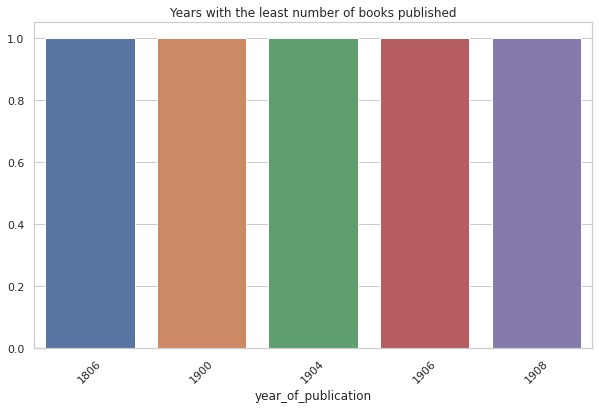

In [120]:
book_years = books.groupby('year_of_publication').count()['isbn'].nsmallest(5)

x = book_years.index
y = book_years.values

plt.figure(figsize = (10,6))
ax = sns.barplot(x = x, y = y)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Years with the least number of books published');

### Who was the most common publisher? 


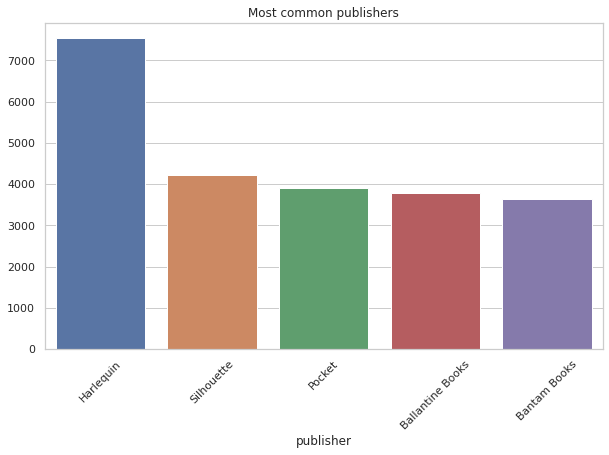

In [122]:
publishers = books.groupby('publisher').count()['isbn'].nlargest(5)

x = publishers.index
y = publishers.values

plt.figure(figsize = (10,6))
ax = sns.barplot(x = x, y = y)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Most common publishers');

### Publishers with the highest rated books

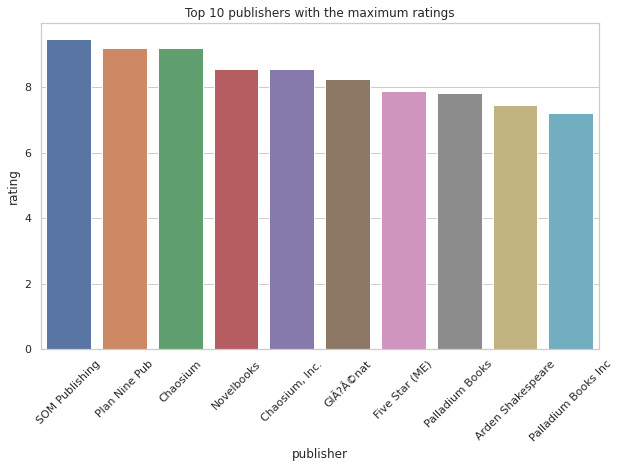

In [37]:
best_publishers = pd.DataFrame(combined_df.groupby('publisher')['rating'].mean())
best_publishers['total_ratings'] = pd.DataFrame(combined_df.groupby('publisher')['rating'].count())
top10_publishers = best_publishers[best_publishers['total_ratings'] > 15].sort_values(by = 'rating', ascending = False).head(10).reset_index()


x = top10_publishers.publisher
y = top10_publishers.rating

plt.figure(figsize = (10,6))
ax = sns.barplot(x = x, y = y)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Top 10 publishers with the maximum ratings');

In [38]:
x

0         SOM Publishing
1          Plan Nine Pub
2               Chaosium
3             Novelbooks
4         Chaosium, Inc.
5              GlÃ?Â©nat
6         Five Star (ME)
7        Palladium Books
8      Arden Shakespeare
9    Palladium Books Inc
Name: publisher, dtype: object

### What are the top 5 books with the most number of ratings? 

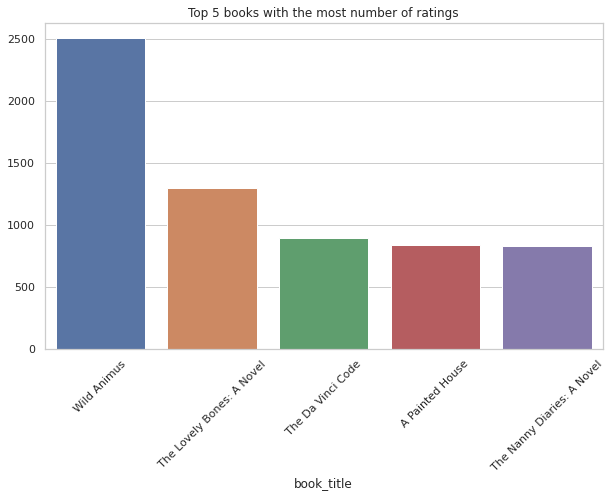

In [60]:
top5 = combined_df.groupby('book_title').count()['isbn'].nlargest(5)

x = top5.index
y = top5.values

plt.figure(figsize = (10,6))
ax = sns.barplot(x = x, y = y)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Top 5 books with the most number of ratings');

### Which are the top rated books (in absolute terms)? 

In [78]:
best_10_books_abs = combined_df.groupby('book_title')['rating'].mean().sort_values(ascending=False).head(10)
pd.DataFrame(best_10_books_abs)

,rating
book_title,
Film Is: The International Free Cinema,10.0
"More Secrets of Happy Children: Embrace Your Power as a Parent--and Help Your Children be Confident, Positive, Well-Adjusted and Happy",10.0
Jo's Boys : From the Original Publisher,10.0
The Vanished Priestess : An Annie Szabo Mystery,10.0
Game and Hunting,10.0
Joan Miro: 1893-1983 (Basic Series),10.0
The Vampire's Apprentice,10.0
The Vampire in Lore and Legend (Dover Books on Anthropology and Folklore),10.0
"The Vampire in Literature: A Critical Bibliography (Studies in Speculative Fiction, No 21)",10.0


Since all the 10 books have a mean rating of 10, this means that there must have been only a few ratings for those books (eventhough they have a 10). As a result, we need to apply a filter that selects the best books relative to the total ratings that the particular book has got.

In [81]:
best_books = pd.DataFrame(combined_df.groupby('book_title')['rating'].mean())
best_books['total_ratings'] = pd.DataFrame(combined_df.groupby('book_title')['rating'].count())
top10_books = best_books[best_books['total_ratings'] > 15].sort_values(by = 'rating', ascending = False).head(10).reset_index()

top10_books

,book_title,rating,total_ratings
0,Chobits (Chobits),8.035714,28
1,Free,8.017857,56
2,There's Treasure Everywhere--A Calvin and Hobb...,7.882353,17
3,El Hobbit,7.692308,26
4,The Teenage Liberation Handbook: How to Quit S...,7.176471,17
5,Where the Sidewalk Ends : Poems and Drawings,7.121212,33
6,A Kiss for Little Bear,7.100000,20
7,Bad Business,7.000000,20
8,Making Faces,7.000000,16
9,Pourquoi j'ai mangÃ?Â© mon pÃ?Â¨re,6.941176,17


### Who are the most frequent authors?

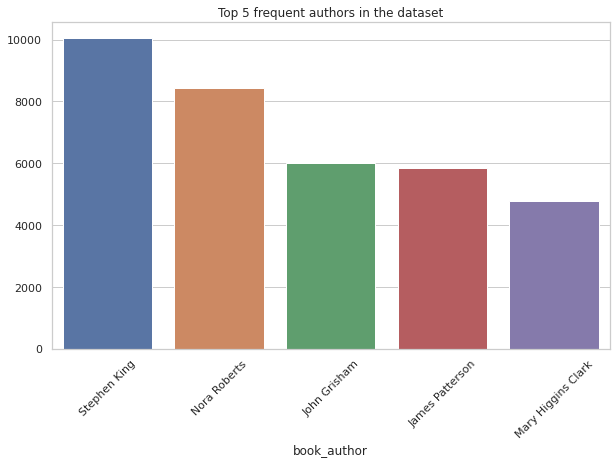

In [83]:
top_auth = combined_df.groupby('book_author')['isbn'].count().nlargest(5)

x = top_auth.index
y = top_auth.values

plt.figure(figsize = (10,6))
ax = sns.barplot(x = x, y = y)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Top 5 frequent authors in the dataset');

### Authors with the maximum ratings

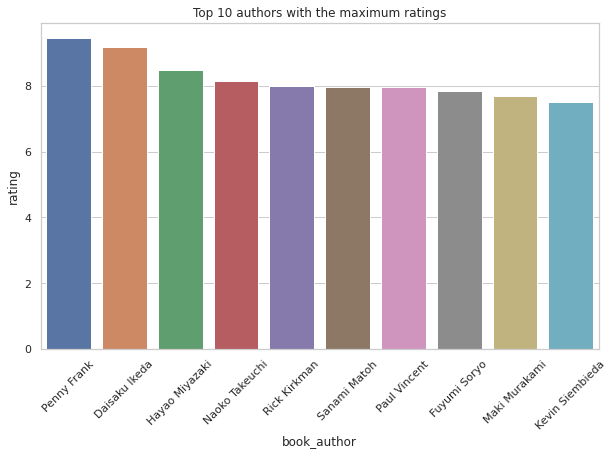

In [39]:
best_authors = pd.DataFrame(combined_df.groupby('book_author')['rating'].mean())
best_authors['total_ratings'] = pd.DataFrame(combined_df.groupby('book_author')['rating'].count())
top10_authors = best_authors[best_authors['total_ratings'] > 15].sort_values(by = 'rating', ascending = False).head(10).reset_index()


x = top10_authors.book_author
y = top10_authors.rating

plt.figure(figsize = (10,6))
ax = sns.barplot(x = x, y = y)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Top 10 authors with the maximum ratings');

In [41]:
x

0        Penny Frank
1      Daisaku Ikeda
2     Hayao Miyazaki
3     Naoko Takeuchi
4       Rick Kirkman
5       Sanami Matoh
6       Paul Vincent
7       Fuyumi Soryo
8      Maki Murakami
9    Kevin Siembieda
Name: book_author, dtype: object